# DL4M_Group7Demo

## Load the model

In [ ]:
! pip install panns-inference

In [ ]:
!pip install tensorflow==2.16.1

In [3]:
import demo as d
import tensorflow
print(tensorflow.__version__)

2.16.1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load the best checkpoint of the model
optimizer = 'adam'
loss = 'binary_crossentropy'
metrics = ["accuracy"]
model_path = '/content/drive/MyDrive/class-DL/DL4M_Group7Demo/model/panns_model.json'
model_weights = '/content/drive/MyDrive/class-DL/DL4M_Group7Demo/model/panns_weights.weights.h5'

model = d.reload_lstm(model_path, model_weights, optimizer, loss, metrics)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [6]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 128)                 │       1,114,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,122,945 (4.28 MB)

 Trainable params: 1,122,945 (4.28 MB)

 Non-trainable params: 0 (0.00 B)

## Rap Detector
### Input:
*   30s audio, sr=44100
*   (batch_size, num_samples) ➡ extracting PANNs embeddings
*   (num_audios, num_frames, embeddings) ➡ input shape

### Output
*   '0' ➡ detected as rap
*   '1' ➡ detected as speech







## Detecting...

### Speaking? Rapping?

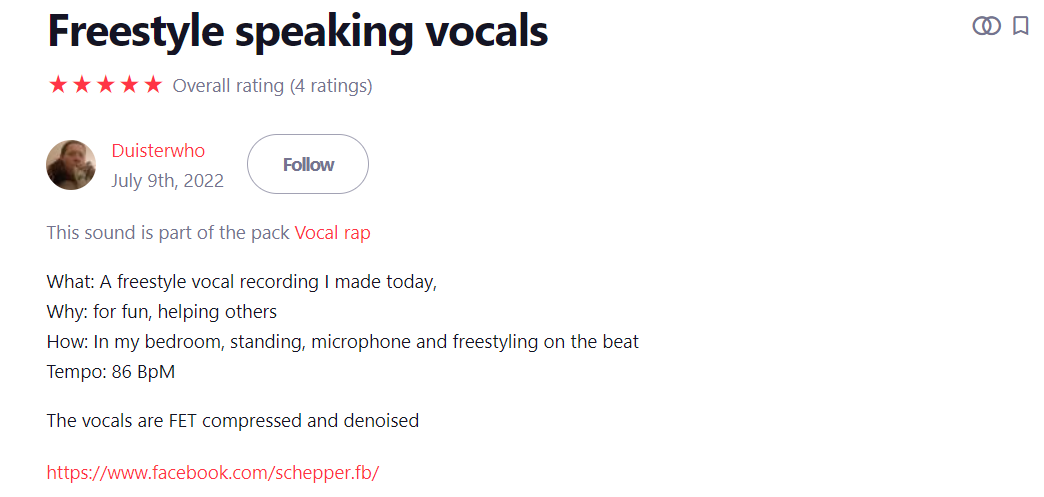

https://freesound.org/people/Duisterwho/sounds/641064/

In [7]:
import librosa
import IPython
import numpy as np

In [8]:
test_audio_path = '/content/drive/MyDrive/class-DL/DL4M_Group7Demo/demo_audios/freestyle-speaking-vocals.wav'
test_audio, sr = librosa.load(test_audio_path, sr=44100)
num_samples = int(30 * sr)
first_30_audio = test_audio[:num_samples]

In [9]:
print(sr, first_30_audio.shape[0])

44100 1323000


#### Take a listen!

In [10]:
IPython.display.Audio(first_30_audio, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

#### Predict!

In [11]:
first_30_input = d.get_panns_input(first_30_audio, sr)
print(first_30_input.shape)

Checkpoint path: /root/panns_data/Cnn14_mAP=0.431.pth
Using CPU.
Checkpoint path: /root/panns_data/Cnn14_DecisionLevelMax.pth
Using CPU.
(1, 4135, 2048)


In [12]:
first_30_result = model.predict(first_30_input)
print(first_30_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.88440984]]


### Have a second try

In [13]:
second_30_audio = test_audio[num_samples:num_samples*2]
print(sr, second_30_audio.shape[0])

44100 1323000


In [14]:
IPython.display.Audio(second_30_audio, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

#### Predict!

In [15]:
second_30_input = d.get_panns_input(first_30_audio, sr)
print(second_30_input.shape)

Checkpoint path: /root/panns_data/Cnn14_mAP=0.431.pth
Using CPU.
Checkpoint path: /root/panns_data/Cnn14_DecisionLevelMax.pth
Using CPU.
(1, 4135, 2048)


In [16]:
second_30_result = model.predict(second_30_input)
print(second_30_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.88440984]]


### Nick's rap (in Chinese)

In [17]:
nick_C, sr = librosa.load('/content/drive/MyDrive/class-DL/DL4M_Group7Demo/demo_audios/DL4M_FINAL_PROJ_-_01_-_Chinese.wav', sr=44100)
mono_nick_C = librosa.to_mono(nick_C)

In [18]:
IPython.display.Audio(mono_nick_C, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
nick_C_input= d.get_panns_input(mono_nick_C, sr)
print(nick_C_input.shape)

Checkpoint path: /root/panns_data/Cnn14_mAP=0.431.pth
Using CPU.
Checkpoint path: /root/panns_data/Cnn14_DecisionLevelMax.pth
Using CPU.
(1, 4135, 2048)


In [20]:
nick_C_result = model.predict(nick_C_input)
print(nick_C_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.07414693]]


### Nick's rap (in English)

In [21]:
nick_E, sr = librosa.load('/content/drive/MyDrive/class-DL/DL4M_Group7Demo/demo_audios/DL4M_FINAL_PROJ_-_01_-_English.wav', sr=44100)
mono_nick_E = librosa.to_mono(nick_E)

In [22]:
IPython.display.Audio(mono_nick_E, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
nick_E_input= d.get_panns_input(mono_nick_E, sr)
print(nick_E_input.shape)

Checkpoint path: /root/panns_data/Cnn14_mAP=0.431.pth
Using CPU.
Checkpoint path: /root/panns_data/Cnn14_DecisionLevelMax.pth
Using CPU.
(1, 4135, 2048)


In [24]:
nick_E_result = model.predict(nick_E_input)
print(nick_E_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.0064567]]
